# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


**##### PLEASE READ #####**

The task PDF and the Jupyter notebook featured different tasks!  
I have followed the Jupyter notebook (because I did not notice that there was a difference at first!!), but I will add a few extra tasks that have been featured on the PDF.  
But for that reason I have done a model with ground floor living area and garage area only - and not all variables.  
Since I had already written a long interpretation and summary, I was not happy to change it - especially not knowing which version of tasks was the correct one to follow. 

In [ ]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # I decided against using a scaler.
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error
import statistics

**### Explore the data ###**

In [2]:
# Read in the data set.
ames_df = pd.read_csv('ames.csv')

print(ames_df.shape)
ames_df.head(10)

(2930, 14)


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900
5,1998,1998,926,926,678,1604,2,1,3,1,7,1,470,195500
6,2001,2001,1338,1338,0,1338,2,0,2,1,6,0,582,213500
7,1992,1992,1280,1280,0,1280,2,0,2,1,5,0,506,191500
8,1995,1996,1595,1616,0,1616,2,0,2,1,5,1,608,236500
9,1999,1999,994,1028,776,1804,2,1,3,1,7,1,442,189000


In [ ]:
# Clean and pre-process the data if necessary.

# Check for missing data.
missing_values_count = ames_df.isnull().sum()
missing_values_count

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

In [4]:
# Check if discrete variables by counting unique values.
print("Number of variables")
for col in ames_df:
    no_values = len(ames_df[col].unique())
    print(f"{col}: {no_values}")

Number of variables
Year_Built: 118
Year_Remod_Add: 61
Total_Bsmt_SF: 1058
First_Flr_SF: 1083
Second_Flr_SF: 635
Gr_Liv_Area: 1292
Full_Bath: 5
Half_Bath: 3
Bedroom_AbvGr: 8
Kitchen_AbvGr: 4
TotRms_AbvGrd: 14
Fireplaces: 5
Garage_Area: 603
Sale_Price: 1032


It looks like Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, TotRms_AbvGr and Fireplaces could be discrete values.
That would make sense considering the nature of those variables.

**Visual Exploration**

In [5]:
# Explore the data with visualisations such as histograms and correlation matrices.

# Explore the data with a correlation matrix.
ames_df.corr()


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
Year_Built,1.000000,0.612095,0.407764,0.310463,0.016828,0.241726,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.480726,0.558426
Year_Remod_Add,0.612095,1.000000,0.298393,0.242108,0.158939,0.316855,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.375566,0.532974
Total_Bsmt_SF,0.407764,0.298393,1.000000,0.800429,-0.204487,0.445108,0.325434,-0.054557,0.052721,-0.038612,0.281627,0.333467,0.485608,0.632529
First_Flr_SF,0.310463,0.242108,0.800429,1.000000,-0.250057,0.562166,0.371584,-0.104203,0.106648,0.076025,0.390162,0.406345,0.491208,0.621676
Second_Flr_SF,0.016828,0.158939,-0.204487,-0.250057,1.000000,0.655251,0.404143,0.611634,0.504651,0.069444,0.585214,0.165844,0.127508,0.269373
Gr_Liv_Area,0.241726,0.316855,0.445108,0.562166,0.655251,1.000000,0.630321,0.433949,0.516808,0.117836,0.807772,0.454924,0.483971,0.706780
Full_Bath,0.469406,0.457266,0.325434,0.371584,0.404143,0.630321,1.000000,0.159689,0.359489,0.171175,0.528599,0.229793,0.406497,0.545604
Half_Bath,0.269268,0.211771,-0.054557,-0.104203,0.611634,0.433949,0.159689,1.000000,0.247053,-0.042321,0.346493,0.201871,0.178735,0.285056
Bedroom_AbvGr,-0.055093,-0.021536,0.052721,0.106648,0.504651,0.516808,0.359489,0.247053,1.000000,0.240737,0.672647,0.076971,0.073417,0.143913
Kitchen_AbvGr,-0.137852,-0.142404,-0.038612,0.076025,0.069444,0.117836,0.171175,-0.042321,0.240737,1.000000,0.294445,-0.108085,-0.057576,-0.119814


<Axes: >

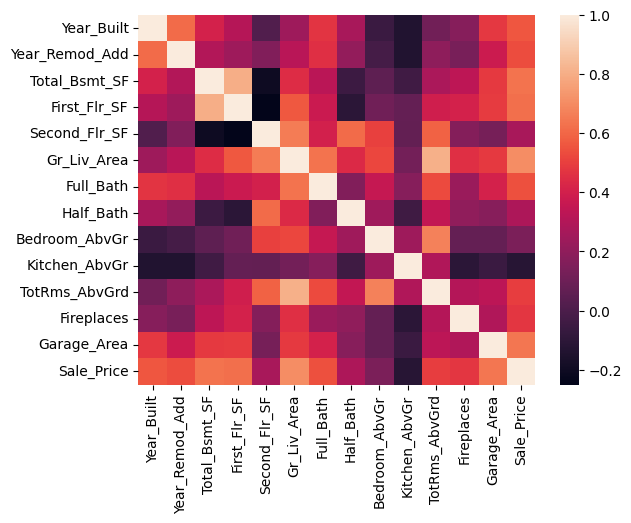

In [6]:
# Seaborn Heatmap shows correlation between variables better visually.
sns.heatmap(ames_df.corr())


array([[<Axes: title={'center': 'Year_Built'}>,
        <Axes: title={'center': 'Year_Remod_Add'}>,
        <Axes: title={'center': 'Total_Bsmt_SF'}>,
        <Axes: title={'center': 'First_Flr_SF'}>],
       [<Axes: title={'center': 'Second_Flr_SF'}>,
        <Axes: title={'center': 'Gr_Liv_Area'}>,
        <Axes: title={'center': 'Full_Bath'}>,
        <Axes: title={'center': 'Half_Bath'}>],
       [<Axes: title={'center': 'Bedroom_AbvGr'}>,
        <Axes: title={'center': 'Kitchen_AbvGr'}>,
        <Axes: title={'center': 'TotRms_AbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'Garage_Area'}>,
        <Axes: title={'center': 'Sale_Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

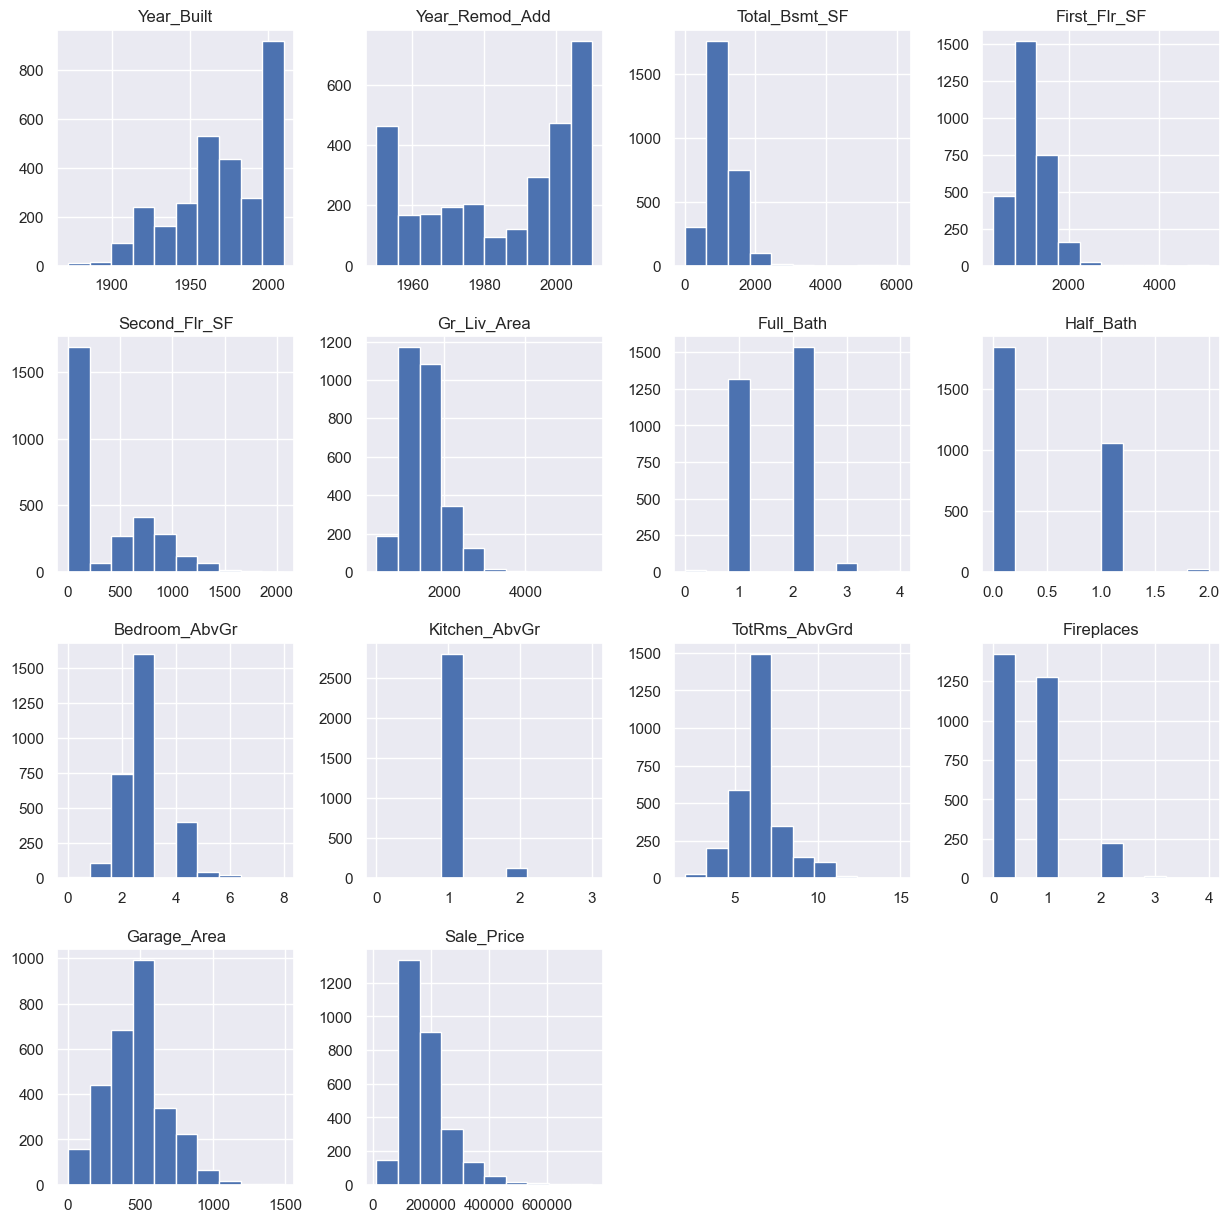

In [7]:
# Explore the data with histograms.
sns.set_theme(style='darkgrid')
ames_df.hist(figsize=(15,15))

**Linear Regression Models for Ground Floor Living Area and Garage Area**
- This is a task that the PDF version of tasks included

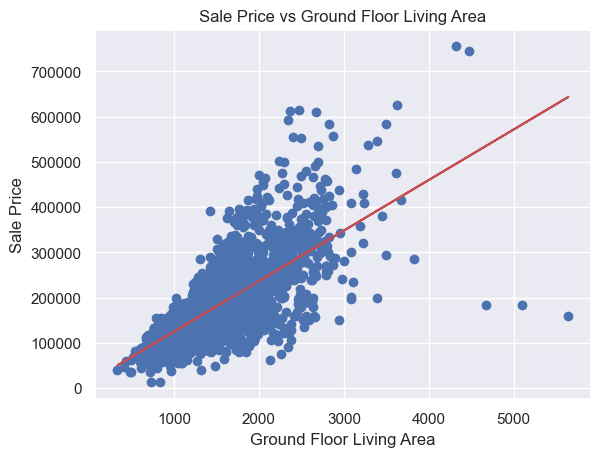

In [ ]:
# Create a Linear Regression model for Gr_Liv_Area.
x1 = ames_df.iloc[:,5].values
y1 = ames_df.iloc[:,-1].values
y1=y1.reshape(-1, 1)
x1=x1.reshape(-1, 1)

# Create an empty linear regression model.
Gr_Liv_Area_model = LinearRegression()

# Create the model using fit(x,y).
Gr_Liv_Area_model.fit(x1,y1)

# Use model to make a prediction.
y_pred1 = Gr_Liv_Area_model.predict(x1)

# Plot model and data.
plt.scatter(x1,y1,color = 'b')
plt.plot(x1,y_pred1,color = 'r')
plt.title('Sale Price vs Ground Floor Living Area')
plt.xlabel('Ground Floor Living Area')
plt.ylabel('Sale Price')
plt.show()

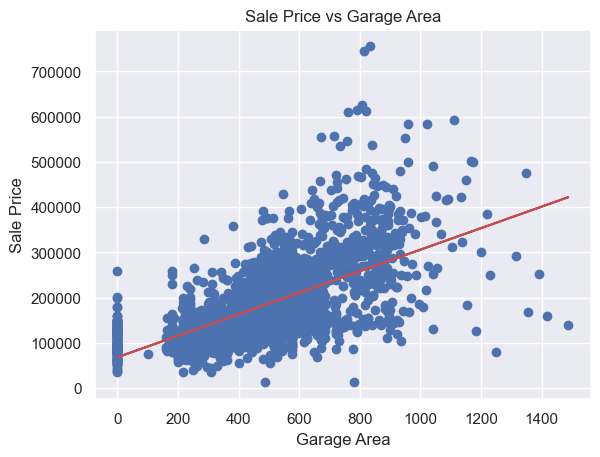

In [ ]:
# Create a Linear Regression model for Garage_Area.
x2 = ames_df.iloc[:,-2].values
y2 = ames_df.iloc[:,-1].values
y2=y2.reshape(-1, 1)
x2=x2.reshape(-1, 1)

# Create an empty linear regression model.
Garage_model = LinearRegression()

# Create the model using fit(x,y).
Garage_model.fit(x2,y2)

# Use model to make a prediction.
y_pred2 = Garage_model.predict(x2)

# Plot model and data.
plt.scatter(x2,y2,color = 'b')
plt.plot(x2,y_pred2,color = 'r')
plt.title('Sale Price vs Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

**### Identify independent and dependent variables ###**

In [10]:
# Split the independent variables from the dependent variable.
X = ames_df.iloc[:,:-1]  # Independent variables
y = ames_df.iloc[:,-1]   # Dependent variable

**### Explore relationships between the independent and dependent variables ###**

**Discrete Variables**

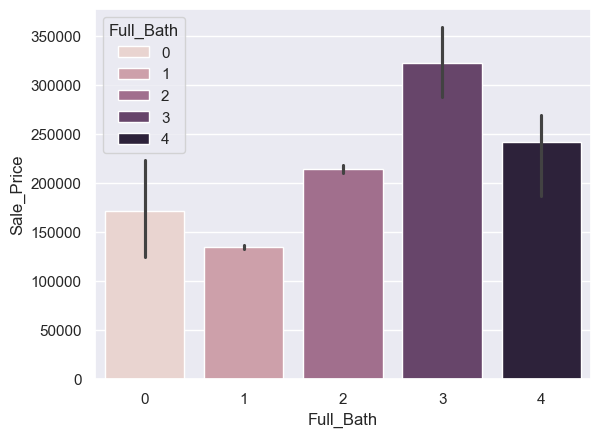

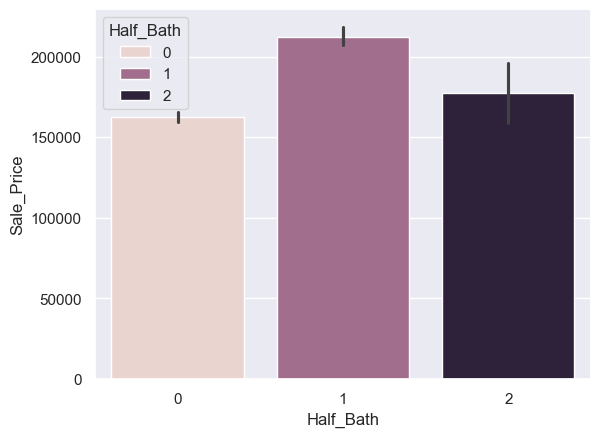

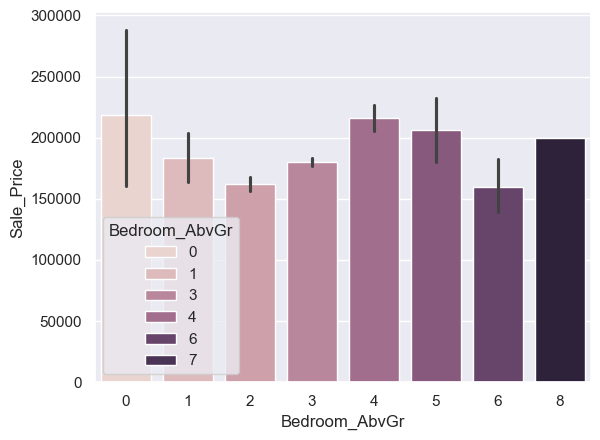

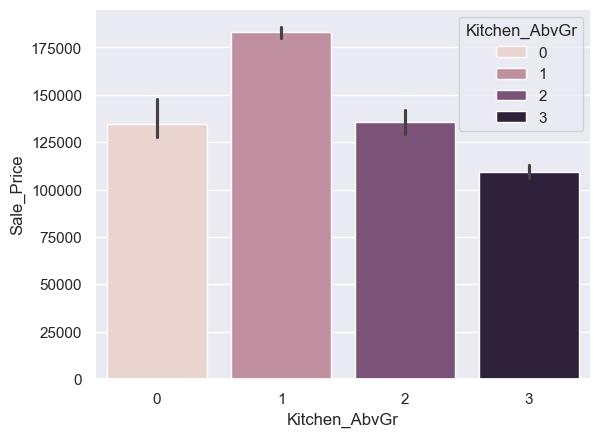

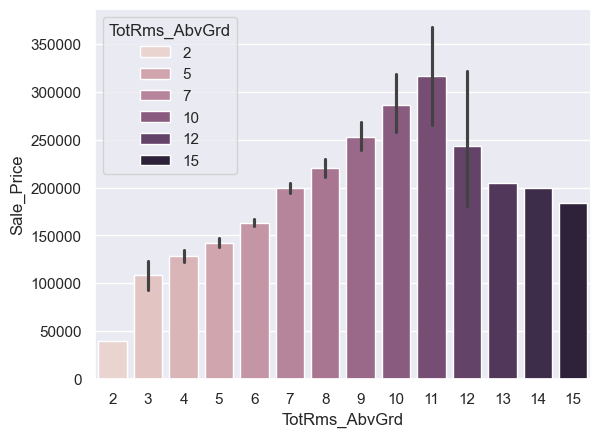

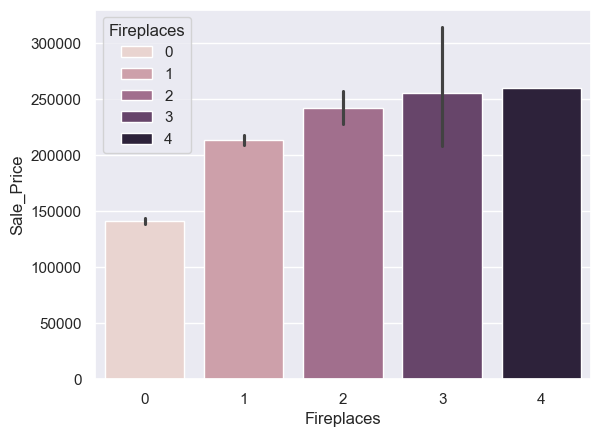

In [11]:
# Explore discrete variables and dependent variable.
discrete = ames_df.iloc[:, 6:12]

for variable in discrete:
    sns.barplot(x=variable, y='Sale_Price', data=ames_df, hue=variable)
    plt.show()

**Time Data**  
I am doing these separately because I want to use a line plot.

Index(['Year_Built', 'Year_Remod_Add'], dtype='object')


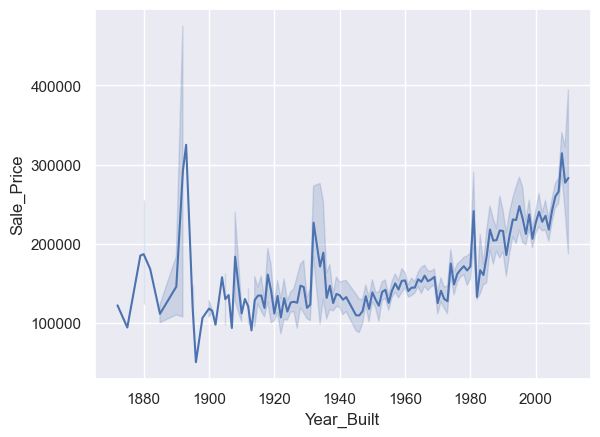

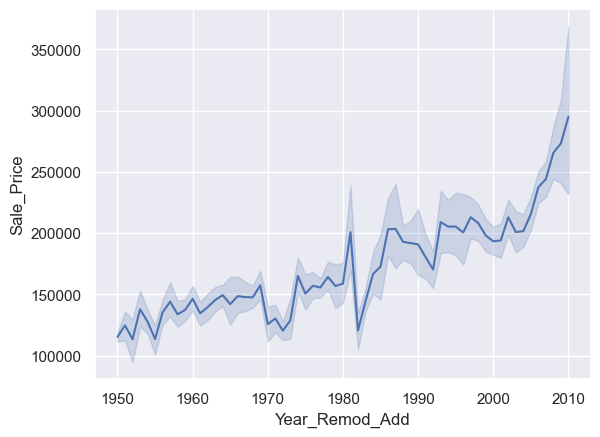

In [12]:
# Explore time data and dependent variable.
years = ames_df.iloc[:, :2]
print(years.columns)

for variable in years:
    sns.lineplot(data= ames_df, y= 'Sale_Price', x= variable)
    plt.show()

**Continuous Variables**

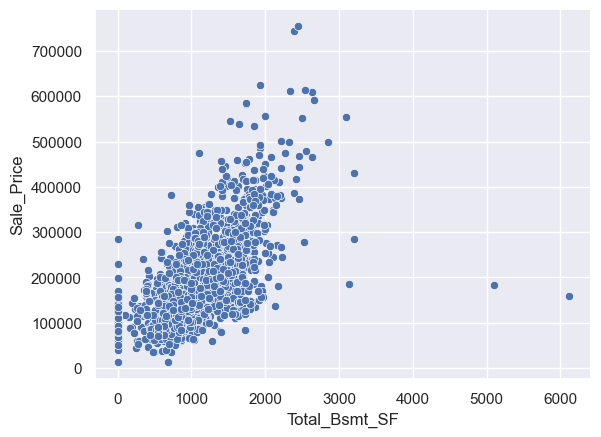

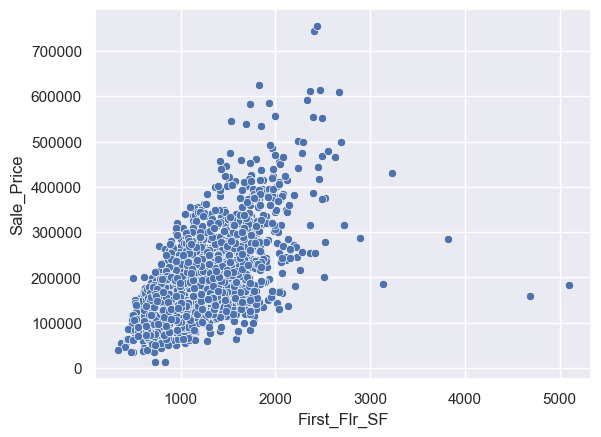

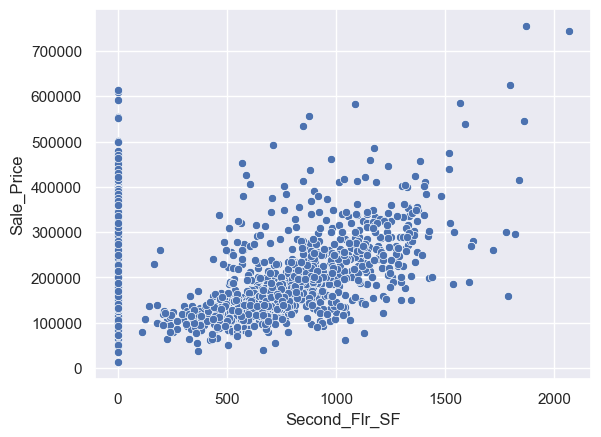

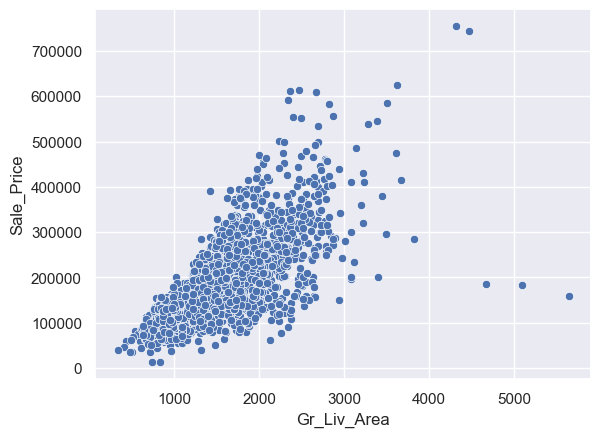

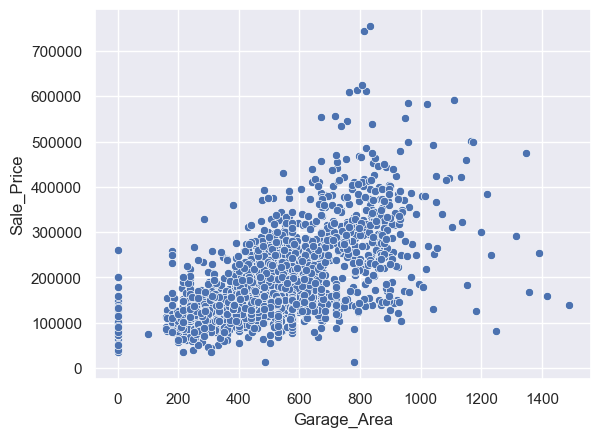

In [13]:
# Explore continuous variables and dependent variable.
continuous = ames_df.iloc[:, [2, 3, 4, 5, -2]]
continuous.columns

for variable in continuous:
    sns.scatterplot(data= ames_df, y= 'Sale_Price', x= variable)
    plt.show()

**### Build a Multiple Regression Model ###**

In [ ]:
# Create a training and test set with a 75:25 split ratio.
rseed = 23 # Use the same random seed for learning purposes to get the same result.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

# Check the shape.
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 13) (2197,)
Test data: (733, 13) (733,)


In [15]:
# Revisit the shape of the X.
X.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482


Below I am only using 'Gr_Liv_Area' and 'Garage_Area' as that was the task written in the Jupyter notebook.  
The task was as follows "Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'"

In [ ]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'.

# Choose desired variables.
X = X.iloc[:,[5,-1]]

# Create a training and test set with a 75:25 split ratio.
rseed = 23 # Use the same random seed for learning purposes to get the same result.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

'''# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)'''
# The scaling made no difference for the predictions.
# That makes sense if you consider that both areas were measured in square feet.

# Fit a model.
lm = LinearRegression()
model = lm.fit(X_train, y_train)

The scaling made no difference for the predictions.  
That makes sense if you consider that both areas were measured in square feet.

In [ ]:
# Print the model intercept and coefficients.
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 -15408.300576936657
Coefficients: 
 [ 86.00612276 143.47756103]


In [ ]:
# Generate predictions for the test set.
predictions = lm.predict(X_test)

# Check actual price vs predicted price.
checks = pd.DataFrame({'Actual Sale Price':y_test, 'Predicted Sale Price':predictions})
checks.head()

,Actual Sale Price,Predicted Sale Price
2233,87000,105306.537973
1735,176485,159127.887870
1912,158500,167769.096909
1513,98000,58900.989489
1764,410000,364961.459477


**Error Plot**  
- This is a task that was only on the PDF version.

In [19]:
# Check the shape of data.
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of predictions: {predictions.shape}")

# Check the type of data.
print('\nX_test type: ', type(X_test))
print('y_test type: ', type(y_test))
print('predictions type: ', type(predictions))

# Turn series and dataframe into array.
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()
print('\nX_test type: ', type(X_test))
print('y_test type: ', type(y_test))

Shape of X_test: (733, 2)
Shape of y_test: (733,)
Shape of predictions: (733,)

X_test type:  <class 'pandas.core.frame.DataFrame'>
y_test type:  <class 'pandas.core.series.Series'>
predictions type:  <class 'numpy.ndarray'>

X_test type:  <class 'numpy.ndarray'>
y_test type:  <class 'numpy.ndarray'>


Note: I am only reshaping the data now because there were previous steps that were easier to perform without reshaped data.  
Such as: Choosing specific columns in the X data frame data to choose our desired variables and  
Creating a table that compares Actual Sale Prices and Predicted Sale Prices.

In [20]:
# Reshape data and check again.
X_test = X_test.reshape(-1, X.shape[1])
y_test = y_test.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)

print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of predictions: {predictions.shape}")

Shape of X_test: (733, 2)
Shape of y_test: (733, 1)
Shape of predictions: (733, 1)


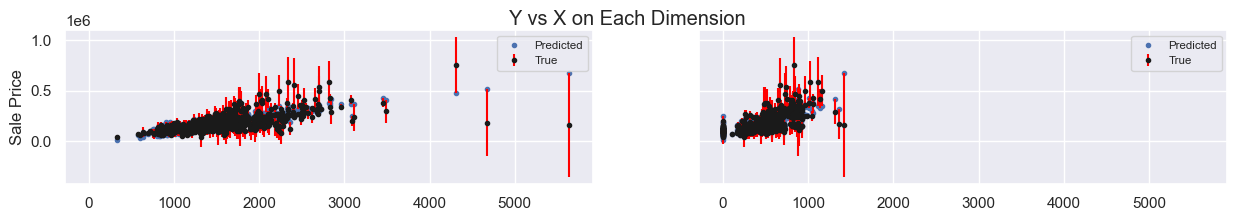

In [21]:
# Plot the errors.
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(15,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel('Sale Price')

# Get values for the error bar.
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars.
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [ ]:
# Evaluate the model.
# The PDF version additionally asked for the mean squared
# error and root mean squared error.
print ("R2 Score:", round(r2_score(y_test, predictions),4))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Root mean Squared Error:", root_mean_squared_error(y_test, predictions))

R2 Score: 0.5696
Mean Squared Error: 2835241787.288366
Root mean Squared Error: 53246.9885278817


**Multiple Linear Regression Plot**

<Axes: >

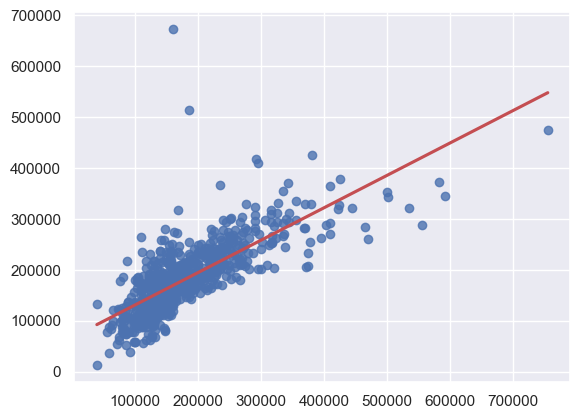

In [23]:
# Generate a plot.
sns.regplot(
    x=y_test, y=predictions, ci=None, color="b", line_kws=dict(color="r"))

In [24]:
# Print the Median Value Prediction.
# This is a task that was only in the PDF version.
print('Median Value Prediction: \n', statistics.median(predictions))

Median Value Prediction: 
 [176014.02468455]


In [25]:
# Print the coefficients.
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 86.00612276 143.47756103]


**Interpret coefficients in the context of the median value prediction**  

Median Value Prediction = 176014.02  
The model predicts a median value of $176,014.02.

Coefficient for Ground Living Area = 86
That means that (if the Garage Area stays consistent), every additional square foot of Ground Living Area will increase the price by approx. $86.
So, an additional square foot of Ground Living Area would increase the median value price to $176,100,02.

Coefficient for Garage Area = 143.48
That means that (if the Living Area stays consistent), every additional square foot of Garage Area will increase the price by approx. $143.48.
So, an additional square foot of Garage Area would increase the median value price to $176,157.50.

**##### PLEASE READ#####**

The task PDF and the Jupyter notebook featured different tasks!  
I have followed the Jupyter notebook (because I did not notice that there was a difference at first!!), but I will add a few extra tasks that have been featured on the PDF.  
But for that reason I have done a model with ground floor living area and garage area only - and not all variables.  
Since I had already written a long interpretation and summary, I was not happy to change it - especially not knowing which version of tasks was the correct one to follow. 

**######################**

**### Summarise findings ###**

**R Squared and the Model Performance**  
Both Ground Floor Living Area and Garage Area have a positive impact on the Sale Prices.  
The model has an r squared of approx .57. This is a moderate fit. Therefore the model performance should be moderate.   
The r2 value indicates that the chosen variables (Ground Floor Living Area and Garage Area) explain about 57% of the variance in Sale Prices.  
That also means that 43% of the variance cannot be explained by those variables.

The generated plot compares the actual Sale Prices (found in the test set) with the generated predictions that the model calculated based on the training set visually.  
It looks like the model is a relatively good fit, except for a few strong outliers:  
There are instances where the Sale Price is very low for the big amount of area.

**Root Mean Squared Error and the Model Performance**  
The root mean squared error is 53246.9885. That means that on average the predictions differ approx. $53,246.99 from the actual Sale Prices.  
That is quite a big discrepancy. But if you look at the scatter plots for Garage Area and especially Ground Floor Living Area in relation to the Sale Price, you can see a few strong outliers.  
I predict that if those were eliminated, the model would predict better and have a smaller root mean squared error.

**Intercept**  
For interpreting the intercept you must consider the following:

y = mx + b

y is the dependent variable.  
x is the independent variable.  
m is the slope.  
b is the intercept.

The intercept is a negative number (-15408.30).
That means in order to have a positive dependent variable (Sale Price) you need to have positive and high enough independent variable (Garage Area and Living Area) to outweigh the negative.  
(Consider that a negative Sale Price is unrealistic as are negative square feet of space.)

**Exploratory Analysis**  

**Correlations:**  
- Very low (negative) correlation between First Floor Living Space and Second Floor Living Space. corr = -0.25  
- Very low (negative) correlation between Basement Area and Second Floor Living Space. corr = -0.2  
- High correlation between First Floor Living Space and Basement Space. corr = .8  
- High correlation between Ground Floor Living Area and Total Rooms Above Ground. corr = .8  

Chosen variables Ground Floor Living Space and Garage Area:  
- High correlation between Sale Price and Ground Floor. corr = .7  
- Relatively high correlation between Sale Price and Garage Area. corr = .64  
- Moderate correlation between Garage Area and Ground Floor. corr = .48  
For our model we want variables that correlate highly with the dependent variable (Sale Price) but not with each other. Therefore the chosen variables seem to be a good fit for building a model.  
(The reason we don't want the variables to have a high correlation, is that we don't want to accidentally use variables that are the same or caused/ influenced by a common other/ unknown variable)

Interesting finds:  
- Amount of Kitchens Above Ground correlates negatively with Year Built (corr = -.1378) and Year Remodelled (-.1424)  
- Amount of Bedrooms Above Ground correlates negatively with Year Built (corr = -.05) and Year Remodelled (-.02)  
It looks like more modern houses have less kitchens and less bedrooms than houses built a longer time ago.

**Distributions:**  
A few interesting things discovered:  
- A lot more houses have been built in the 2000s than earlier  
- Most houses have no second floor.  
- Most houses have 1-2 Full Bathrooms.  

**Relationships between independent and dependent variables**  
A few interesting things discovered:  
- More Full Bathrooms related to higher Sale Price  - But a lower Sale Price when the most Bathrooms (4).  
- The most expensive houses have 1 kitchen. 
- The price of the houses increases with each additional room. But after 11 rooms the price decreases with each room. 
- The more fireplaces a house has the higher the Sale Price gets.  
- It seems like the later a house is built, the more expensive it is. But houses built in the 1890-1900s are very expensive.   
- The later a house was remodelled, the higher the Sale Price. But in the 1980s remodelled houses are worth a bit less.  
- With the exception of outliers it seems like: More Basement, First Floor and Garage Area are related to higher Sale Prices - however, not every house has a basement.  
- Many houses don't have a second floor. But when they do it seems like the more Second Floor Area there is the higher the Sale Price is.